# Testing: Brusselator

In [1]:
# load modules with code for adaptive solvers
include("adaptive-extrapolation-Deuflhard.jl") # implementation based on Deuflhard's ideas
include("adapative-extrapolation-Hairer&Wanner.jl"); # implementation based on Hairer and Wanner's ideas
using Plots;

In [2]:
# define problem
# cf.(4.15) in  E. Hairer, G. Wanner, and S. Nørsett. Solving Ordinary Differential Equations I: Nonstiff Problems. 
function brusselator(t::T,x::Vector{T}) where T<:AbstractFloat
    x′ = zeros(T,2)
    x′[1] = one(T)+x[1]^2*x[2]-4*x[1]
    x′[2] = 3*x[1]-x[1]^2*x[2]
    return x′
end
t₀ = zero(BigFloat)
x₀ = BigFloat.([3//2,3])
tEnd = big"20.0";

In [3]:
# a custom function for the plots
# plot solution
function plotAll(ΔD,xΔD,detailedStatisticD,ΔHW,xΔHW,detailedStatisticHW)
    orderD = detailedStatisticD[1,:]; push!(orderD, NaN) # last point in Δ has no order...
    orderHW = detailedStatisticHW[1,:]; push!(orderHW, NaN)
    stepsizeD = detailedStatisticD[2,:]; push!(stepsizeD, NaN)
    stepsizeHW = detailedStatisticHW[2,:]; push!(stepsizeHW, NaN)
    # setup subplots
    #plt = plot(layout = (3,1), size = (800,600))
    plt = plot(layout = (3,1), size = (900,500), legend =:topright)
    #makeup
    plot!(plt, subplot =1, xlabel = "t", ylabel = "x", legend = false)
    plot!(plt, subplot =2, xlabel = "t", ylabel = "order", ylims = [1,12])
    plot!(plt, subplot =3, xlabel = "t", ylabel = "stepsize", legend = false)
    # plot solution
    plot!(plt, subplot = 1,ΔD, xΔD[1:2,:]', markershape = :circle)
    plot!(plt, subplot = 1,ΔHW,xΔHW[1:2,:]', markershape = :xcross)
    # plot order
    plot!(plt, subplot = 2, ΔHW, orderHW, markershape = :circle, label = "H.&W.")
    plot!(plt, subplot = 2, ΔD, orderD, markershape = :xcross, label = "D.")
    #plot stepsize
    plot!(plt, subplot = 3, ΔHW, stepsizeHW, label = "H.&W.")
    plot!(plt, subplot = 3, ΔD, stepsizeD, label = "D.")
    # print information
    println("Solver of Hairer & Wanner's approach:")
    println("   Number of steps          = $(length(ΔHW)-1)")
    println("   Number of rejected steps = $(Int64(sum(detailedStatisticHW[4,:])))")
    println("Solver of Deufelhard's approach:")
    println("   Number of steps          = $(length(ΔD)-1)")
    println("   Number of rejected steps = $(Int64(sum(detailedStatisticD[4,:])))")
    plt
end;

In [4]:
# initialize solvers
N_max = 15
solverD = AdaptiveExtrapolationD.solver( N_max,"Romberg")
solverHW = AdaptiveExtrapolationHW.solver( N_max,"Romberg");

In [5]:
# compute approximations
opt = Dict(:tol => big"1e-3",
    :absoluteScaling => ones(BigFloat,2),
    :relativeScaling =>  big"1e-3"*ones(BigFloat,2),
    :detailedStatistics => true)
solD = solverD(brusselator,x₀,t₀,tEnd; opt...)
solHW = solverHW(brusselator,x₀,t₀,tEnd; opt...);

## Plot of Solution, Order and Stepsize

Solver of Hairer & Wanner's approach:
   Number of steps          = 21
   Number of rejected steps = 6
Solver of Deufelhard's approach:
   Number of steps          = 33
   Number of rejected steps = 6


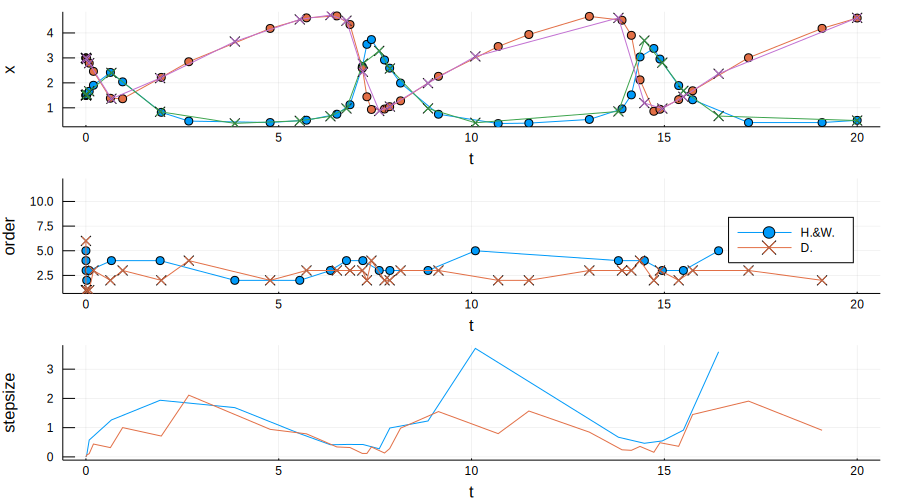

In [6]:
plt = plotAll(solD...,solHW...)